# LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error


from keras.preprocessing.sequence import TimeseriesGenerator

import torch 
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import tensorflow as tf


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# DATA LOADING/CLEANING

In [2]:
valores = pd.read_csv('vendas_data.csv').drop('Unnamed: 0',axis=1)
valores.dtypes

data        object
venda_g    float64
venda_e    float64
dtype: object

In [3]:
valores['data'] = [datetime.strptime(x,'%Y/%m') for x in valores['data']]
valores['data'] = [datetime.strftime(x,'%Y-%m-%d') for x in valores['data']]
valores['data'] = [datetime.strptime(x,'%Y-%m-%d') for x in valores['data']]
print(valores.dtypes)
valores = valores.set_index('data').rename(columns={'venda_g':'valores_g','venda_e':'valores_e'})



data       datetime64[ns]
venda_g           float64
venda_e           float64
dtype: object


In [4]:
prod = pd.read_csv('production_data.csv')
print(prod.dtypes)

data        object
prod_pe    float64
prod_et    float64
dtype: object


In [5]:
prod['data'] = [datetime.strptime(x,'%Y-%m-%d') for x in prod['data']]
print(prod.dtypes)
prod = prod.set_index('data')

data       datetime64[ns]
prod_pe           float64
prod_et           float64
dtype: object


In [6]:
venda = pd.read_csv('cleaned_data.csv').drop(['diff_g','diff_e'],axis=1)
venda.dtypes

data         object
values_g    float64
values_e    float64
dtype: object

In [7]:
venda['data'] = [datetime.strptime(x,'%Y-%m-%d') for x in venda['data']]
print(venda.dtypes)
venda = venda.set_index('data').rename(columns={'values_g':'vendas_g','values_e':'vendas_e'})

data        datetime64[ns]
values_g           float64
values_e           float64
dtype: object


In [8]:
df = pd.concat([valores,venda,prod],axis=1)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
valores_g,201.0,3.117226,0.811936,2.167779,2.457727,2.740000,3.645396e+00,5.702940e+00
valores_e,201.0,2.019365,0.694712,1.005715,1.390909,1.892401,2.570339e+00,4.396707e+00
vendas_g,201.0,711140.672848,135129.625186,436700.079000,590027.422000,673912.349000,8.385062e+05,1.025739e+06
vendas_e,201.0,629101.092494,204360.280110,167570.003000,501730.413000,644873.768000,7.633272e+05,1.077622e+06
prod_pe,201.0,655109.750909,648666.621339,648.000000,6608.360000,343253.960000,1.352118e+06,1.776600e+06
prod_et,201.0,406487.089303,512819.261269,1.000000,1.000000,31298.938000,8.962863e+05,1.758499e+06


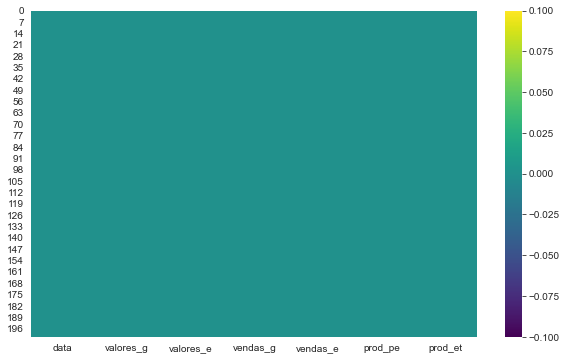

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.reset_index().isnull(),cmap ='viridis');

# EXPLORATORY DATA ANALYSES

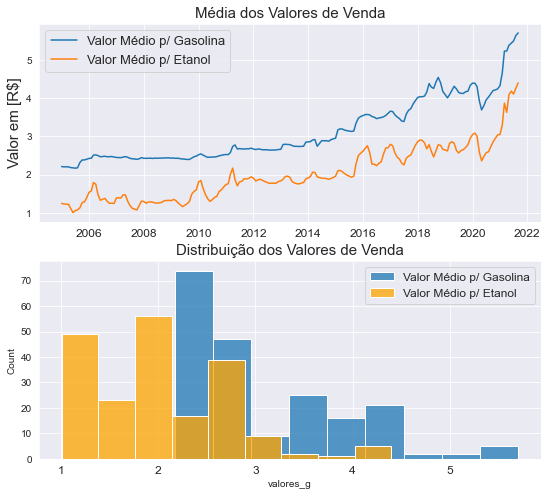

In [11]:
plt.figure(figsize=(9,8))

plt.subplot(2,1,1)
plt.title('Média dos Valores de Venda',fontsize=15)
plt.ylabel('Valor em [R$]',fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True)
plt.plot(valores['valores_g'],label = 'Valor Médio p/ Gasolina')
plt.plot(valores['valores_e'],label = 'Valor Médio p/ Etanol')
plt.legend(fontsize=13)
plt.subplot(2,1,2)
plt.title('Distribuição dos Valores de Venda',fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True)
sns.histplot(valores['valores_g'],label = 'Valor Médio p/ Gasolina',stat='count')
sns.histplot(valores['valores_e'],label = 'Valor Médio p/ Etanol',stat='count',color='orange')
plt.legend(fontsize=13)

plt.legend(fontsize=12)

plt.show()

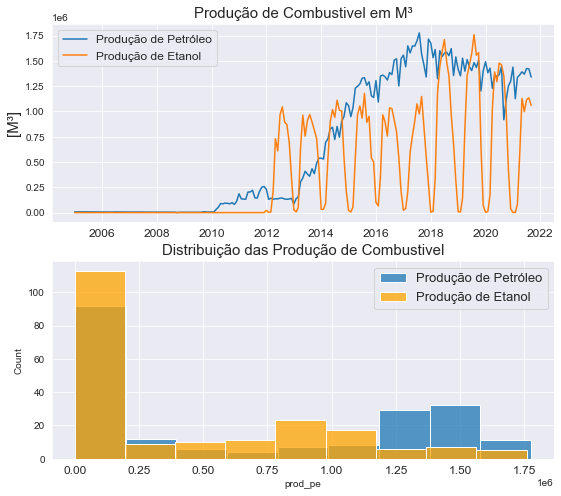

In [12]:
plt.figure(figsize=(9,8))

plt.subplot(2,1,1)
plt.title('Produção de Combustivel em M³',fontsize=15)
plt.ylabel('[M³]',fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True)
plt.plot(prod['prod_pe'],label = 'Produção de Petróleo')
plt.plot(prod['prod_et'],label = 'Produção de Etanol')
plt.legend(fontsize=12)

plt.subplot(2,1,2)
plt.title('Distribuição das Produção de Combustivel',fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True)
sns.histplot(prod['prod_pe'],label = 'Produção de Petróleo',stat='count')
sns.histplot(prod['prod_et'],label = 'Produção de Etanol', stat='count',color= 'orange')
plt.legend(fontsize=13)

plt.show()

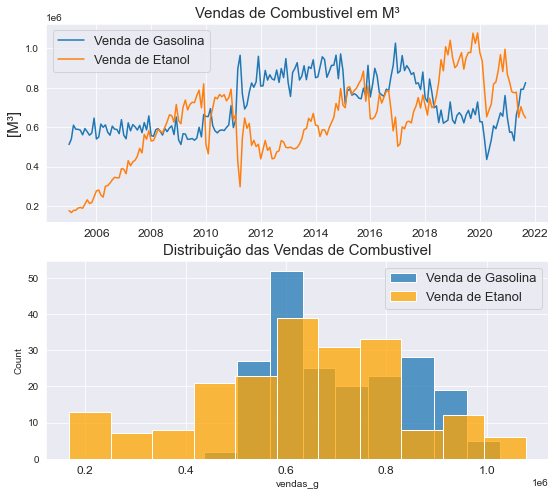

In [13]:
plt.figure(figsize=(9,8))

plt.subplot(2,1,1)
plt.title('Vendas de Combustivel em M³',fontsize=15)
plt.ylabel('[M³]',fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True)
plt.plot(venda['vendas_g'],label = 'Venda de Gasolina')
plt.plot(venda['vendas_e'],label = 'Venda de Etanol')
plt.legend(fontsize=13)

plt.subplot(2,1,2)
plt.title('Distribuição das Vendas de Combustivel',fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True)
sns.histplot(venda['vendas_g'],label = 'Venda de Gasolina',stat='count')
sns.histplot(venda['vendas_e'],label = 'Venda de Etanol', stat='count',color= 'orange')
plt.legend(fontsize=13)

plt.show()

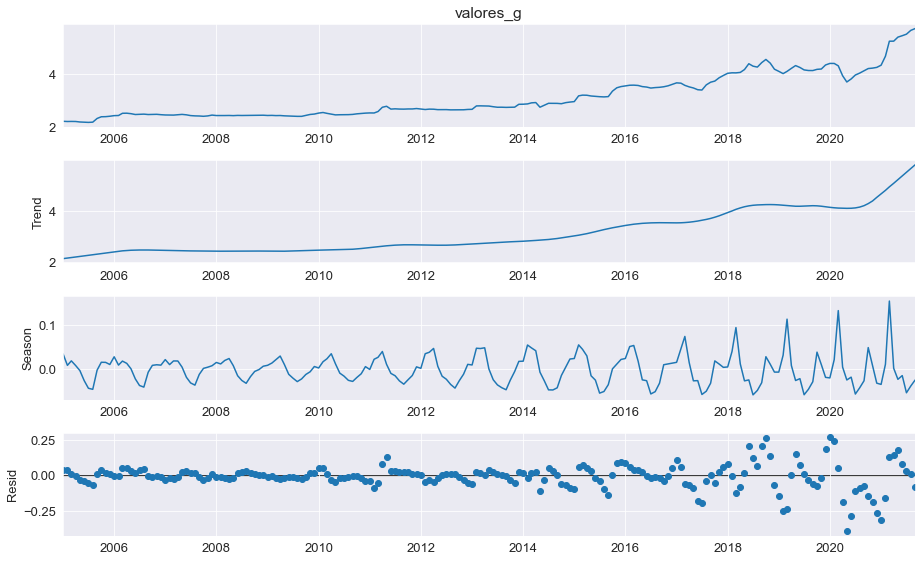

In [14]:
plt.rc("figure", figsize=(13, 8))
plt.rc("font", size=13)

ts = df['valores_g'].to_frame()
ts = ts.asfreq('MS')

stl = STL(ts['valores_g'], seasonal= 13)
res = stl.fit()
fig = res.plot()

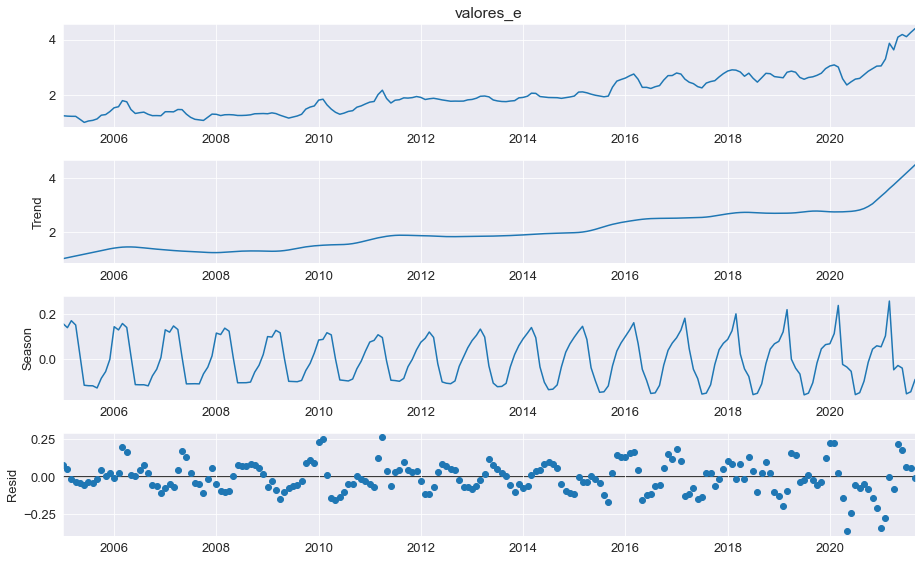

In [15]:
ts = df['valores_e'].to_frame()
ts = ts.asfreq('MS')

stl = STL(ts['valores_e'], seasonal= 13)
res = stl.fit()
fig = res.plot()

# FEATURE ENGINEERING

In [16]:
matrix = df.corr()

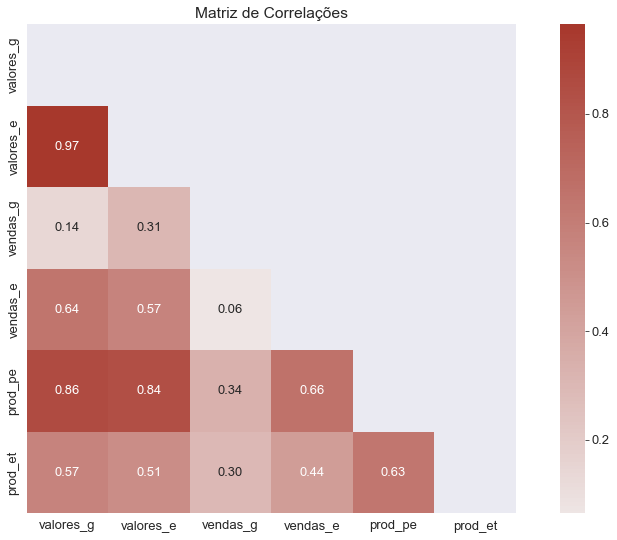

In [17]:
plt.figure(figsize=(16,9))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.title("Matriz de Correlações")
plt.show()

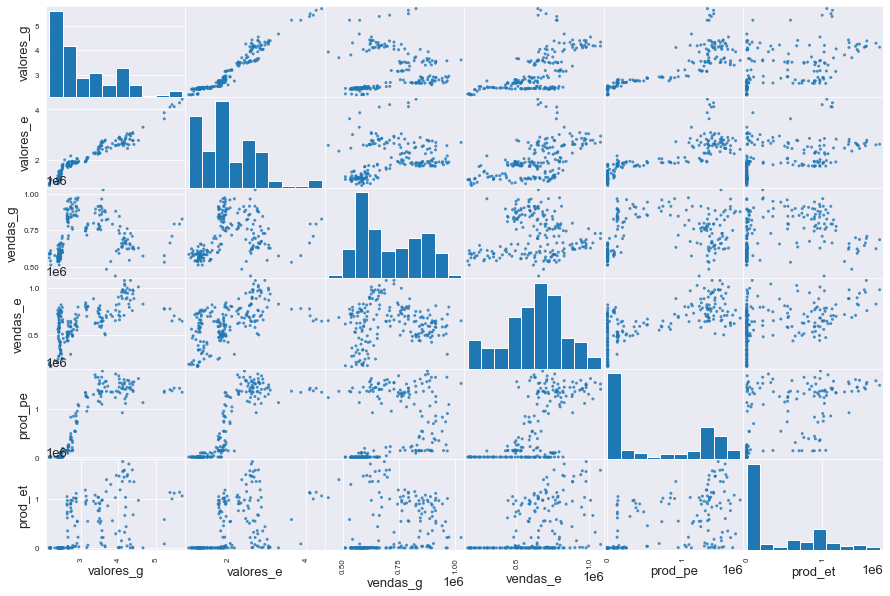

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,10),alpha = 0.8)
plt.show()


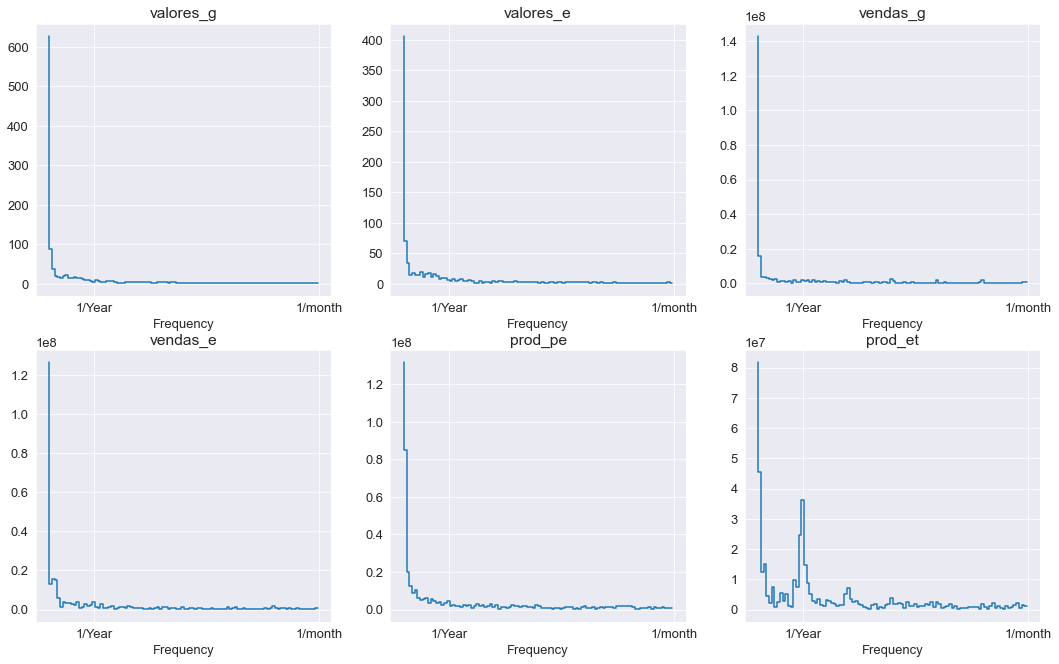

In [19]:
plt.figure(figsize = (18,17))
i = 1
for feature in df.columns:
    
    plt.subplot(3,3,i)
    fft = tf.signal.rfft(df[feature])
    frequencies = np.arange(0,len(fft))

    n_sample_months = len(df[feature])
    months_per_year = 12
    years_in_data   = n_sample_months/months_per_year

    freq_year_based = frequencies/years_in_data
    
    plt.step(freq_year_based,np.abs(fft))   
    plt.title(feature)
    plt.xticks([1, 6], labels=['1/Year', '1/month'])
    _ = plt.xlabel('Frequency')
    
    i += 1


In [20]:
temp = df.reset_index()
temp['ano'] = [datetime.strftime(x,"%Y") for x in temp['data']]
temp['ano'] = temp['ano'].astype(float)

temp['mes'] = [datetime.strftime(x,"%m") for x in temp['data']]
temp['mes'] = temp['mes'].astype(float)
temp.head(3)

,data,valores_g,valores_e,vendas_g,vendas_e,prod_pe,prod_et,ano,mes
0,2005-01-01,2.209182,1.245870,512555.163,177653.088,7654.0,1.0,2005.0,1.0
1,2005-02-01,2.201278,1.231983,540210.582,167570.003,6675.0,1.0,2005.0,2.0
2,2005-03-01,2.203887,1.225708,610238.053,178347.196,7245.0,1.0,2005.0,3.0


In [21]:
lista = list()
for mes in temp['mes']:
    if mes <= 6:
        lista.append(1)
    else:
        lista.append(2)
temp['semestre'] = lista


lista = list()
for mes in temp['mes']:
    if mes in range(1,4):
        lista.append(0)
    elif mes in range(4,7):
        lista.append(1)
        
    elif mes in range(7,9):
        lista.append(2)
    
    elif mes in range(9,13):
        lista.append(3)
temp['trimestre'] = lista

temp.head(4)

,data,valores_g,valores_e,vendas_g,vendas_e,prod_pe,prod_et,ano,mes,semestre,trimestre
0,2005-01-01,2.209182,1.245870,512555.163,177653.088,7654.0,1.0,2005.0,1.0,1,0
1,2005-02-01,2.201278,1.231983,540210.582,167570.003,6675.0,1.0,2005.0,2.0,1,0
2,2005-03-01,2.203887,1.225708,610238.053,178347.196,7245.0,1.0,2005.0,3.0,1,0
3,2005-04-01,2.201641,1.224315,589855.454,179719.148,7069.0,1.0,2005.0,4.0,1,1


In [22]:
df['cos_ano'] = np.cos(2*np.pi*(temp['ano'].values/2021))
df['sin_ano'] = np.sin(2*np.pi*(temp['ano'].values/2021))

df['cos_sem'] = np.cos(2*np.pi*(temp['semestre'].values/2))
df['sin_sem'] = np.sin(2*np.pi*(temp['semestre'].values/2))

df['cos_tri'] = np.cos(2*np.pi*(temp['trimestre'].values/4))
df['sin_tri'] = np.sin(2*np.pi*(temp['trimestre'].values/4))

df.corr().head(2)

,valores_g,valores_e,vendas_g,vendas_e,prod_pe,prod_et,cos_ano,sin_ano,cos_sem,sin_sem,cos_tri,sin_tri
valores_g,1.000000,0.965231,0.142708,0.644689,0.864331,0.566358,0.795583,0.909514,0.001405,-0.001405,-0.012712,0.008978
valores_e,0.965231,1.000000,0.307956,0.569222,0.839386,0.512822,0.830033,0.913934,-0.056858,0.056858,0.071076,0.014573


In [23]:
df = df.drop(['cos_sem','sin_sem','cos_tri','sin_tri'],axis=1)
temp = df.reset_index()

In [24]:
colunas = ['valores_g', 'valores_e', 'vendas_g', 'vendas_e', 'prod_pe','prod_et']
for feature in colunas:   
    temp[feature] = np.log(temp[feature])
temp.head(3)

,data,valores_g,valores_e,vendas_g,vendas_e,prod_pe,prod_et,cos_ano,sin_ano
0,2005-01-01,0.792622,0.219834,13.147164,12.087588,8.942984,0.0,0.998763,-0.049723
1,2005-02-01,0.789038,0.208625,13.199714,12.029156,8.806124,0.0,0.998763,-0.049723
2,2005-03-01,0.790223,0.203519,13.321604,12.091487,8.888067,0.0,0.998763,-0.049723


In [25]:
scaler_vendas_g   = MinMaxScaler()
scaler_vendas_e   = MinMaxScaler()

scaler_prod_g     = MinMaxScaler()
scaler_prod_e     = MinMaxScaler()

scaler_valores_g  = MinMaxScaler()
scaler_valores_e  = MinMaxScaler()

temp['valores_g'] = scaler_valores_g.fit_transform(temp['valores_g'].values.reshape(-1,1))
temp['valores_e'] = scaler_valores_e.fit_transform(temp['valores_e'].values.reshape(-1,1))

temp['vendas_g'] = scaler_vendas_g.fit_transform(temp['vendas_g'].values.reshape(-1,1))
temp['vendas_e'] = scaler_vendas_e.fit_transform(temp['vendas_e'].values.reshape(-1,1))

temp['prod_pe'] = scaler_prod_g.fit_transform(temp['prod_pe'].values.reshape(-1,1))
temp['prod_et'] = scaler_prod_e.fit_transform(temp['prod_et'].values.reshape(-1,1))

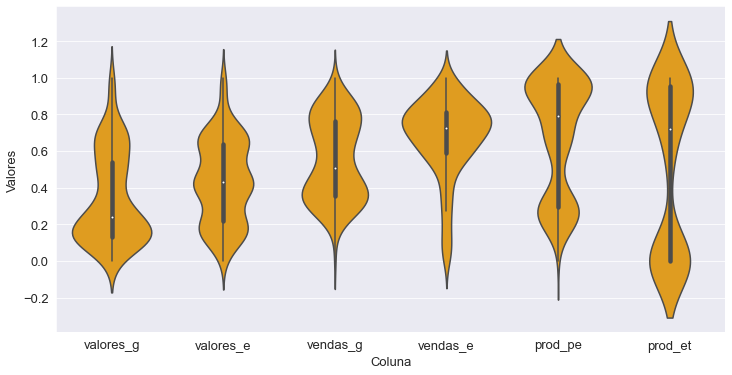

In [26]:
t = temp.set_index('data').drop(['sin_ano','cos_ano'],axis=1)
t = t.melt(var_name = 'Coluna',value_name = 'Valores')

plt.figure(figsize=(12,6))

sns.violinplot(x='Coluna',y='Valores',data = t, color = 'orange')
plt.show()

In [27]:
temp.to_csv('temp.csv')
df.to_csv('df.csv')